**source: https://wikidocs.net/16107**

### study1.py

- study1.py를 아래와 같이 작성

- unittest.TestCase를 상속받아야 함

- test_로 시작하는 메소드는 모두 테스트 메소드가 됨

- unittest.main()을 통해 테스트가 수행됨

In [ ]:
import unittest


# TestCase를 작성
class CustomTests(unittest.TestCase): 

    def test_runs(self):
        """단순 실행여부 판별하는 테스트 메소드"""

        custom_function()


# unittest를 실행
if __name__ == '__main__':  
    unittest.main()

custom_function이 정의되지 않았기 때문에 fail

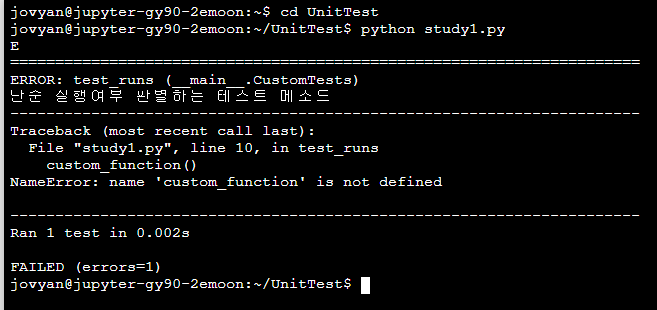

### study1_1.py

- study1의 custom_funcion을 정의

In [ ]:
import unittest


def custom_function():
    pass

# TestCase를 작성
class CustomTests(unittest.TestCase): 

    def test_runs(self):
        """단순 실행여부 판별하는 테스트 메소드"""

        custom_function()


# unittest를 실행
if __name__ == '__main__':  
    unittest.main()

test 성공

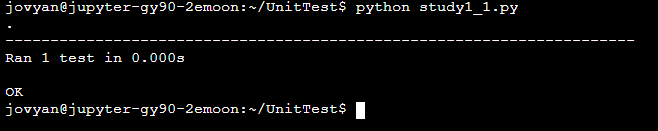

### study2.py

- 파일을 하나 작성(setUp), 해당 파일을 검사한 후(test_), 해당 파일을 삭제(tearsDown) 

- setUp, tearDown : 각각 테스트 전, 후에 수행되는 Fixture

In [ ]:
import unittest
import os


def custom_function(file_name):
    with open(file_name, 'rt') as f:
        return sum(1 for _ in f)


# TestCase를 작성
class CustomTests(unittest.TestCase):

    def setUp(self):
        """테스트 시작되기 전 파일 작성"""
        self.file_name = 'test_file.txt'
        with open(self.file_name, 'wt') as f:
            f.write("""
            파이썬에는 정말 단위테스트 모듈이 기본으로 포함되어 있나요? 진짜?
            멋지군요!
            단위테스트를 잘 수행해보고 싶습니다!
            """.strip())

    def tearDown(self):
        """테스트 종료 후 파일 삭제 """
        try:
            os.remove(self.file_name)
        except:
            pass

    def test_runs(self):
        """단순 실행여부 판별하는 테스트 메소드"""
        print('test_runs')
        custom_function(self.file_name)

    def test_line_count(self):
        '''custom_function(self.file_name)을 수행하고 결과가3이면 테스트를 통과'''
        print('test_line_count')
        self.assertEqual(custom_function(self.file_name), 3)


# unittest를 실행
if __name__ == '__main__':
    unittest.main()

test_runs, test_line_count 두 개의 테스트가 실행 성공

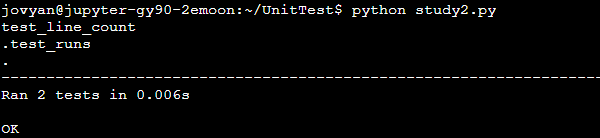

### study2_1.py

- 의도한 에러가 발생하는 지 테스트

- **assertRaises()** 메소드를 활용하여 내부 코드에서 에러가 발생하는 지 확인

In [ ]:
import unittest
import os


def custom_function(file_name):
    with open(file_name, 'rt') as f:
        return sum(1 for _ in f)


# TestCase를 작성
class CustomTests(unittest.TestCase):

    def setUp(self):
        """테스트 시작되기 전 파일 작성"""
        self.file_name = 'test_file.txt'
        with open(self.file_name, 'wt') as f:
            f.write("""
            파이썬에는 정말 단위테스트 모듈이 기본으로 포함되어 있나요? 진짜?
            멋지군요!
            단위테스트를 잘 수행해보고 싶습니다!
            """.strip())

    def tearDown(self):
        """테스트 종료 후 파일 삭제 """
        try:
            os.remove(self.file_name)
        except:
            pass

    def test_runs(self):
        """단순 실행여부 판별하는 테스트 메소드"""
        print('test_runs')
        custom_function(self.file_name)

    def test_line_count(self):
        '''custom_function(self.file_name)을 수행하고 결과가3이면 테스트를 통과'''
        print('test_line_count')
        self.assertEqual(custom_function(self.file_name), 3)
        
    def test_no_file(self):
        with self.assertRaises(IOError):
            custom_function(self.file_name)


# unittest를 실행
if __name__ == '__main__':
    unittest.main()

 - 3개의 테스트(test_runs, test_line_count, test_no_files) 중 하나가 실패(test_no_files)
 
 - test_no_files는 의도된 에러가 발생해야 테스트가 성공하는 케이스

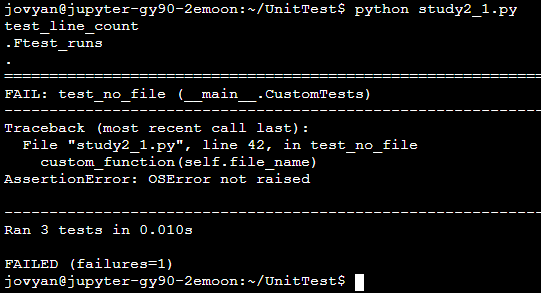

### study2_2.py

In [ ]:
import unittest
import os


def custom_function(file_name):
    with open(file_name, 'rt') as f:
        return sum(1 for _ in f)


# TestCase를 작성
class CustomTests(unittest.TestCase):

    def setUp(self):
        """테스트 시작되기 전 파일 작성"""
        self.file_name = 'test_file.txt'
        with open(self.file_name, 'wt') as f:
            f.write("""
            파이썬에는 정말 단위테스트 모듈이 기본으로 포함되어 있나요? 진짜?
            멋지군요!
            단위테스트를 잘 수행해보고 싶습니다!
            """.strip())

    def tearDown(self):
        """테스트 종료 후 파일 삭제 """
        try:
            os.remove(self.file_name)
        except:
            pass

    def test_runs(self):
        """단순 실행여부 판별하는 테스트 메소드"""
        print('test_runs')
        custom_function(self.file_name)

    def test_line_count(self):
        '''custom_function(self.file_name)을 수행하고 결과가3이면 테스트를 통과'''
        print('test_line_count')
        self.assertEqual(custom_function(self.file_name), 3)
        
    def test_no_file(self):
        with self.assertRaises(IOError):
            custom_function('abc.txt')  


# unittest를 실행
if __name__ == '__main__':
    unittest.main()

abc.txt라는 setUp을 통해 작성되지 않는 파일이 지정됨에 따라 의도된 에러가 발생함

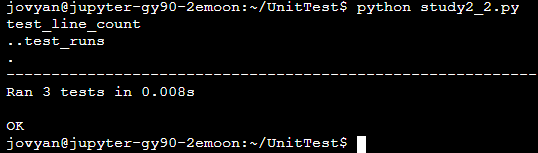

**source: https://wikidocs.net/132725**

- 입력된 연도가 윤년인지 체크하는 코드 테스트

### study3.py

- 아래의 테스트는 적절하지 않은 테스트 

- 4로 나누어 떨어지는 연도가 윤년이라는 내용을 체크하지 못함

**assertTrue(a): a가 참인지 조사한다.**

In [ ]:
import unittest


def leap_year(year):
    if year == 0:
        return True


class LeapYearTest(unittest.TestCase):
    def test_leap_year(self):
        self.assertTrue(leap_year(0))


if __name__ == '__main__':
    unittest.main()

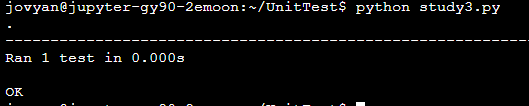

### study3_1.py

- 윤년의 정의를 정확히 반영한 코드를 이용하여 테스트

In [ ]:
import unittest


def leap_year(year):
    if year % 400 == 0:
        return True
    elif year % 100 == 0:
        return False
    elif year % 4 == 0:
        return True
    else:
        return False


class LeapYearTest(unittest.TestCase):
    def test_leap_year(self):
        self.assertTrue(leap_year(0))
        self.assertFalse(leap_year(1))
        self.assertTrue(leap_year(4))
        self.assertTrue(leap_year(1200))
        self.assertFalse(leap_year(700))


if __name__ == '__main__':
    unittest.main()

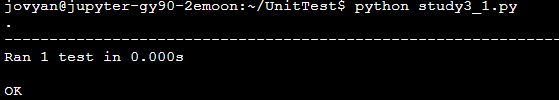

### study3_2.py

- 윤년 확인 함수 leap_year()의 테스트를 보강

- calender 패키지의 isleap()을 이용하여 1~100000년까지의 결과가 같은지를 테스트

**assertEqual(a, b): a와 b가 같은지를 조사한다.**

In [ ]:
import unittest


def leap_year(year):
    if year % 400 == 0:
        return True
    elif year % 100 == 0:
        return False
    elif year % 4 == 0:
        return True
    else:
        return False


class LeapYearTest(unittest.TestCase):
    def test_leap_year(self):
        self.assertTrue(leap_year(0))
        self.assertFalse(leap_year(1))
        self.assertTrue(leap_year(4))
        self.assertTrue(leap_year(1200))
        self.assertFalse(leap_year(700))

    def test_same_calendar(self):
        import calendar
        for year in (1, 100000):
            self.assertEqual(leap_year(year), calendar.isleap(year))


if __name__ == '__main__':
    unittest.main()

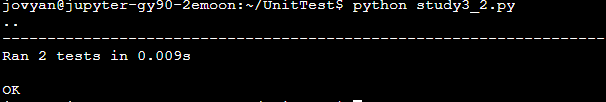